In [608]:
import math
import copy

from PIL import Image

In [714]:
def text_to_bits(text):
    orig = ''.join([bin(ord(x))[2:].zfill(7) for x in text])
    extras = ''.join(['0' for i in range(3-((len(orig)) % 3))])
    orig += extras
    return orig

def text_from_bits(bits):
    cut_bits = [bits[x:x+6] for x in range(len(bits)) if x % 6 == 0]
    return [chr(int(x, 2)) for x in cut_bits]

In [715]:
im = Image.open('test.jpg')
im.size

(960, 640)

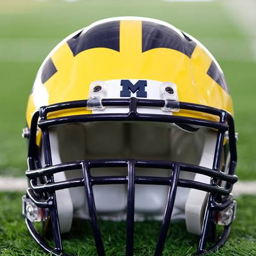

In [716]:
crop_region = (220, 50, 720, 550)
sq = im.crop(crop_region)
front = sq.resize((256,256))
front_saved = sq.resize((256,256))
front

In [717]:
# Least Significant Bit (LSB)
def encode_lsb(picture, message):
    
    binary_message = text_to_bits(message)
    print('encoded length', len(binary_message))
    triplets = [binary_message[x:x+3] for x in range(len(binary_message)) if x % 3 == 0]
    print('encoded triples', len(triplets))
    
    img_x = 0
    img_y = 0

    pixels = picture.load()
    while len(triplets) > 0:
        tri_string = triplets.pop(0)
        if len(tri_string) != 3:
            print(tri_string)
        triplet = (int(tri_string[0]), int(tri_string[1]), int(tri_string[2]))
        orig = pixels[img_x, img_y]
        new = tuple([orig[i]+triplet[i] for i in range(3)])
        pixels[img_x, img_y] = new
        if img_x == picture.size[0]-1:
            img_x = 0
            img_y += 1
        else:
            img_x += 1
    return picture

In [718]:
message1 = "Ohio Came To Bury Michigan, All Wrapped In Maize And Blue / The Words Were Said, The Prayers Were Read And Everybody Cried / But When They Closed The Coffin, There Was Someone Else Inside! / The Bucks Came To Bury The Wolverines – But Michigan Wasn’t Dead, / And When The Game Was Over, It Was Someone Else Instead. / Twenty-Two Michigan Wolverines Put On The Gloves Of Gray, / And As Revelli Played “The Victors”, They Laid Woody Hayes Away!"
message2 = "What the mind can conceive and believe, the body can achieve, and those who stay will be champions"

code1 = encode_lsb(copy.copy(front), message1)
code1 == front_saved # if this is false, the image has been changed

encoded length 3123
encoded triples 1041


False

In [719]:
def message_from_binary(bits):
    cut_bits = [bits[x:x+7] for x in range(len(bits)) if x % 7 == 0]

    chars = []
    for n in cut_bits:
        chars.append(chr(int(n, 2)))
    decoded = ''.join(chars).replace('\x00', '')
    return decoded
#     return ''.join(chars)

In [720]:
# Extract from LSB given original image

def decode_lsb(code_pic, orig):
    
    extracted_triples = []

    current_x = 0
    current_y = 0
    loaded = [code_pic.load(), orig.load()]
    num_zero_diff = 0
    dim = code_pic.size
    while (current_y < dim[1]) and (current_x != dim[0]):
        code_pixel = loaded[0][current_x, current_y]
        orig_pixel = loaded[1][current_x, current_y]
        extracted = tuple([code_pixel[c]-orig_pixel[c] for c in range(3)])
    #     print(extracted)
        if extracted == (0,0,0):
            num_zero_diff += 1
        extracted_triples.append(extracted)
        if current_x == dim[0]-1:
            current_x = 0
            current_y += 1
        else:
            current_x += 1
    print('extracted triples', len(extracted_triples))
    binary = ''.join([''.join(str(c) for c in trip) for trip in extracted_triples])
    print(len(binary))
    return message_from_binary(binary)

In [721]:
decode_lsb(copy.copy(code1), front_saved)

extracted triples 65536
196608


'Ohio Came To Bury Michigan, All Wrapped In Maize And Blue / The Words Were Said, The Prayers Were Read And Everybody Cried / But When They Closed The Coffin, There Was Someone Else Inside! / The Bucks Came To Bury The Wolverines @\x13 But Michigan Wasn@\x19t Dead, / And When The Game Was Over, It Was Someone Else Instead. / Twenty-Two Michigan Wolverines Put On The Gloves Of Gray, / And As Revelli Played @\x1cThe Victors@\x1d, They Laid Woody Hayes Away!'

encoded length 687
encoded triples 229


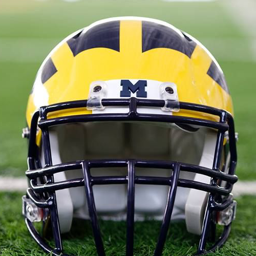

In [722]:
code2 = encode_lsb(copy.copy(front), message2)
code2

In [723]:
decode_lsb(copy.copy(code2), front_saved)

extracted triples 65536
196608


'What the mind can conceive and believe, the body can achieve, and those who stay will be champions'

In [724]:
def calc_message_max_len(pic):
    num_pix = pic.size[0]*pic.size[1]
    return (num_pix*3) // 7

In [725]:
calc_message_max_len(im)

263314

In [729]:
filename = 'essay_text.txt'

with open(filename, 'r') as f:
    plaintext = f.read()

max_len = calc_message_max_len(front)
if len(plaintext) <= max_len:
    coded = encode_lsb(copy.copy(front), plaintext)
else:
    print('Plaintext is {} characters longs, but we only have {}. Upload a larger photo.'.format(len(plaintext), max_len))

encoded length 14640
encoded triples 4880


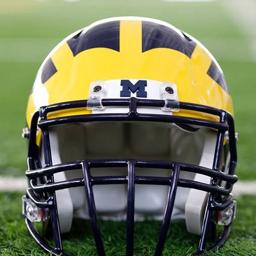

In [730]:
coded

In [731]:
print(decode_lsb(copy.copy(coded), front))

extracted triples 65536
196608
The Victors
(L.Elbel)/Regents of the University of Michigan

Now for a cheer they are here,
triumphant!
Here they come with banners flying,
In stalwart step they're nighing,
With shouts of vict'ry crying,
We hurrah, hurrah, we greet you now,
Hail!

Far we their praises sing
For the glory and fame they've bro't us
Loud let the bells them ring
For here they come with banners flying
Far we their praises tell
For the glory and fame they've bro't us
Loud let the bells them ring
For here they come with banners flying
Here they come, Hurrah!

Hail! to the victors valiant
Hail! to the conqu'ring heroes
Hail! Hail! to Michigan
the leaders and best
Hail! to the victors valiant
Hail! to the conqu'ring heroes
Hail! Hail! to Michigan,
the champions of the West!

We cheer them again
We cheer and cheer again
For Michigan, we cheer for Michigan
We cheer with might and main
We cheer, cheer, cheer
With might and main we cheer!

Hail! to the victors valiant
Hail! to the con